# Data Wrangling

## Advanced Data Wrangling

---

Steps - *Note: bolded points are phases of data wrangling*
1. Define a question (what is the general population of stray dogs in San Antonio, TX)
2. **Gather data** (distributed field surveys on foot and in cars turned in, compiling into single CSV or something)
3. **Assess data** (What issues are there, what's missing, what's inaccurate, etc.)
4. **Clean data** (Remove missing values, adjust inaccuracies, regather data)
5. Answer question (Do some descriptive statistics)

---

**Exploratory Data Analysis (EDA)** comes after data wrangling

**ETL vs. Wrangling**
- ETL - gather and combine data into one spot (data warehouse)
  - Done on structured data
- Wrangling - gather, assess, clean data
  - Done on complex/messy data

Wrangling is a cycle that you might come back to here and there. It's not a linear progression in the real world.

---

**Project Steps Summary**
- Gather two datasets using two different data gathering methods.
- Assess the data according to two quality and two tidiness metrics.
- Clean the data to solve the four issues found in the assessing step,
- Combine your two datasets into one dataset
- Update the data store with the cleaned data.
- Produce visualizations on the cleaned data, and answer a research question on the dataset.

---

### Gathering Data

#### Programatically Unzipping Files with Python

In [2]:
import zipfile as z

try:
    with z.ZipFile("file.zip", "r") as zip_ref:
        zip_ref.extractall("targetdir")  # can untar and probably more
except:
    print("yeah")

yeah


#### Working with flat files (TSV, CSV)

In [3]:
try:
    tsv_list = []
    with open("filename.csv") as tsv_file:
        for line in tsv_file:
            tsv_list.append(line.rstrip('\n').split('\t'))

    '''OR'''

    import pandas as pd

    df_tsv = pd.read_csv('filename.tsv', sep='\t')  # can also do ';' if that's the delimiter, as well as... anything else
    df_tsv.head()
    # Much simpler
except:
    print("yeah")

yeah


#### `.read_csv()` parameters/args

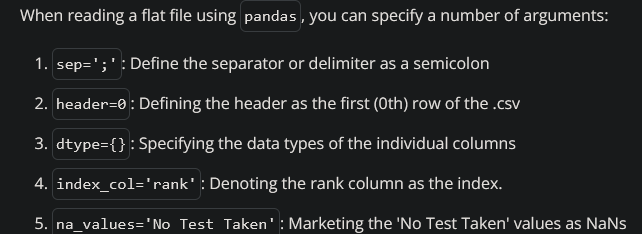

`na_values` just says what values to replace with a NaN. 

#### Programatically Downloading Files

In [4]:
import requests
import os

In [ ]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/SeptemberBumblebee/59ad9901_3-the-third-man/3-the-third-man.txt']  # this one will return a 403

In [20]:
type(response.content)

bytes

In [ ]:
for url in ebert_review_urls:
    response = requests.get(url)  # HTTP GET request
    response.raise_for_status()   # if response code is error, raise an error
    folder_path = os.getcwd() + "\\" + "datasets" + "\\" +  "ebert_reviews_2017"
    path = os.path.join(folder_path, url.split('/')[-1])  # grabs filename from url and joins with a foldername
    
    print(path)

    with open(path, mode='wb') as f:  # 'write+binary mode' because that is the datatype of the content attrib
        f.write(response.content)

c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\1-the-wizard-of-oz-1939-film.txt
c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\2-citizen-kane.txt
c:\Users\Ethan\OneDrive\Documents\Code\Python Projects\data-wrangling\datasets\ebert_reviews_2017\3-the-third-man.txt


HTTPError: 403 Client Error: Forbidden for url: https://d17h27t6h515a5.cloudfront.net/topher/2017/SeptemberBumblebee/59ad9901_3-the-third-man/3-the-third-man.txt

In [15]:
os.listdir(folder_path)

['1-the-wizard-of-oz-1939-film.txt',
 '2-citizen-kane.txt',
 '3-the-third-man.txt']

#### Encoding/Char sets

You can specify if a file is in UTF-8 or ASCII or something while reading them.

Ex. 
```python
pd.read_csv('test.csv', encoding='utf8')
```

#### Encoding/Decoding built-in methods

In [ ]:
'hello world'.encode('ASCII')  # converts to "Bytes" type

b'hello world'

In [ ]:
b'hello world'.decode('ASCII')  # converts to unicode "str" type

'hello world'

#### Reading text files

In [26]:
import glob  # allows you to use NIX-like paths
import pandas as pd

In [30]:
glob.glob(folder_path + "/*.txt")

['c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\1-the-wizard-of-oz-1939-film.txt',
 'c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\2-citizen-kane.txt',
 'c:\\Users\\Ethan\\OneDrive\\Documents\\Code\\Python Projects\\data-wrangling\\datasets\\ebert_reviews_2017\\3-the-third-man.txt']

['title', 'review_url', 'review_text']

In [ ]:
text_list = []

for review in glob.glob(folder_path + "/*.txt"):  # glob patterns!
    with open(review, encoding="utf-8") as f:
        title = f.readline()[:-1] # slice off \n

        review_url = f.readline()[:-1]
        review_text = f.read()  # read the rest of the file

        text_list.append({'title': title,
                          'review_url': review_url,
                          'review_text': review_text})
        
    df = pd.DataFrame(text_list, columns=list(text_list[0].keys()))

df.head()

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Citizen Kane (1941),http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
2,The Third Man (1949),http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...


#### Gathering Data w/ APIs

In [ ]:
import requests
import json
import os

In [52]:
book = requests.get("https://archive.org/metadata/cu31924067841738")
book

<Response [200]>

In [53]:
book.raise_for_status()

In [54]:
json_data = book.json()
print(json_data)

{'created': 1751529242, 'd1': 'ia601304.us.archive.org', 'd2': 'ia801304.us.archive.org', 'dir': '/12/items/cu31924067841738', 'files': [{'name': '__ia_thumb.jpg', 'source': 'original', 'mtime': '1653667852', 'size': '19027', 'md5': '9e451931d5183c5fea9e1ff9710d3b30', 'crc32': 'b91c4379', 'sha1': '84f729b6118df1e60f1db3a75017b1312c7db959', 'format': 'Item Tile', 'rotation': '0'}, {'name': 'cu31924067841738.djvu', 'source': 'derivative', 'format': 'DjVu', 'original': 'cu31924067841738_djvu.xml', 'md5': '244b045ec10de46d78e140f6c13a86e2', 'mtime': '1257613982', 'size': '5933724', 'crc32': '38d9d914', 'sha1': '8c915daa0ed20788d60424ea536db6d38b7e254c'}, {'name': 'cu31924067841738.epub', 'source': 'derivative', 'original': 'cu31924067841738_abbyy.gz', 'mtime': '1700038661', 'size': '3639480', 'md5': '9eecc6e95791ef536c548abfd0fca9f3', 'crc32': '9e3a7aa1', 'sha1': '94ecf7bf5d63d3b3456979413c73d768d80e714e', 'format': 'EPUB'}, {'name': 'cu31924067841738.gif', 'source': 'derivative', 'format'

In [59]:
fullpath = os.getcwd() + "\\datasets\\archive_org\\book.json"
with open(fullpath, 'w') as f:
    json.dump(json_data, f)

##### We can also use customized libs

In [ ]:
from internetarchive import get_item

book = get_item('cu31924067841738') # returns Item object
print(book)

Item(identifier='cu31924067841738')


In [62]:
for k,v in book.metadata.items():
    print(k, ":", v)

mediatype : texts
collection : ['cornell', 'americana']
title : The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry
identifier : cu31924067841738
uploader : hank@archive.org
addeddate : 2009-11-01 15:20:02
identifier-access : http://www.archive.org/details/cu31924067841738
identifier-ark : ark:/13960/t4vh63v8d
sponsor : MSN
contributor : Cornell University Library
description : ['The metadata below describe the original scanning. Follow the "All Files: HTTP" link in the "View the book" box to the left to find XML files that contain more metadata about the original images and the derived formats (OCR results, PDF etc.). See also the <a href="http://www.archive.org/about/faqs.php#140" rel="nofollow">What is the directory structure for the texts?</a> FAQ for information about file content and naming conventions.', 'viii, 360 p. 20 cm']
camera : EOS-1Ds MarkII
lcamid : 338213
rcamid : 336718
o

##### Now we'll play with the returned data

In [ ]:
book = requests.get("https://archive.org/metadata/cu31924067841738")

<class 'bytes'>
<class 'str'>


In [68]:
print(type(book.content))
print(type(book.text))

<class 'bytes'>
<class 'str'>


You can load either the binary data or the string data and store as a JSON using `json.loads()`

In [73]:
json_book_content = json.loads(book.content)

In [74]:
json_book_text = json.loads(book.text)

json_book_content == json_book_text

True

Or you can just use the `.json()` method on the `response` object

In [76]:
book.json() == json_book_content

True

In [ ]:
json_book_content  # explore the data

{'created': 1751529242,
 'd1': 'ia601304.us.archive.org',
 'd2': 'ia801304.us.archive.org',
 'dir': '/12/items/cu31924067841738',
 'files': [{'name': '__ia_thumb.jpg',
   'source': 'original',
   'mtime': '1653667852',
   'size': '19027',
   'md5': '9e451931d5183c5fea9e1ff9710d3b30',
   'crc32': 'b91c4379',
   'sha1': '84f729b6118df1e60f1db3a75017b1312c7db959',
   'format': 'Item Tile',
   'rotation': '0'},
  {'name': 'cu31924067841738.djvu',
   'source': 'derivative',
   'format': 'DjVu',
   'original': 'cu31924067841738_djvu.xml',
   'md5': '244b045ec10de46d78e140f6c13a86e2',
   'mtime': '1257613982',
   'size': '5933724',
   'crc32': '38d9d914',
   'sha1': '8c915daa0ed20788d60424ea536db6d38b7e254c'},
  {'name': 'cu31924067841738.epub',
   'source': 'derivative',
   'original': 'cu31924067841738_abbyy.gz',
   'mtime': '1700038661',
   'size': '3639480',
   'md5': '9eecc6e95791ef536c548abfd0fca9f3',
   'crc32': '9e3a7aa1',
   'sha1': '94ecf7bf5d63d3b3456979413c73d768d80e714e',
   'for

Use bracket notation to access a certain key

In [ ]:
print(json_book_content['files'][0]['name'] + ":", json_book_content['files'][0]['sha1'])

__ia_thumb.jpg: 84f729b6118df1e60f1db3a75017b1312c7db959


In [101]:
json_book_content['metadata']

{'mediatype': 'texts',
 'collection': ['cornell', 'americana'],
 'title': 'The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry',
 'identifier': 'cu31924067841738',
 'uploader': 'hank@archive.org',
 'addeddate': '2009-11-01 15:20:02',
 'identifier-access': 'http://www.archive.org/details/cu31924067841738',
 'identifier-ark': 'ark:/13960/t4vh63v8d',
 'sponsor': 'MSN',
 'contributor': 'Cornell University Library',
 'description': ['The metadata below describe the original scanning. Follow the "All Files: HTTP" link in the "View the book" box to the left to find XML files that contain more metadata about the original images and the derived formats (OCR results, PDF etc.). See also the <a href="http://www.archive.org/about/faqs.php#140" rel="nofollow">What is the directory structure for the texts?</a> FAQ for information about file content and naming conventions.',
  'viii, 360 p. 20 cm'],
 'ca

In [103]:
print("Title is:", json_book_content['metadata']['title'])

Title is: The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry


In [106]:
json_book_content['reviews'][0]['stars']

'1'

In [ ]:
dictionary = {1: 'help', 2: 'me'}
json.dumps(dictionary)  # converts/serializes the dictionary object into dictionary. opposite would be using .loads()
# notice that the keys are strings. JSON only supports keys that are strings

'{"1": "help", "2": "me"}'

#### Web Scraping

Gathering HTML files and extracting data

In [111]:
import requests

# Downloading HTML page content
book = requests.get("https://archive.org/details/cu31924067841738")  # different from the metadata subdir, as that is the API
with open("./datasets/archive_org/language_of_flowers.html", mode='wb') as f:
    f.write(book.content)  # content = binary therefore 'wb' mode

##### Extracting the book title programatically

In [112]:
from bs4 import BeautifulSoup

with open('./datasets/archive_org/language_of_flowers.html') as f:
    flower_soup = BeautifulSoup(f, 'html.parser')  # parse this file w/ the html parser

flower_soup

<!DOCTYPE html>

<html lang="en">
<!-- __ _ _ _ __| |_ (_)__ _____
    / _` | '_/ _| ' \| |\ V / -_)
    \__,_|_| \__|_||_|_| \_/\___| -->
<head data-node="www08.us.archive.org" data-release="64456e44">
<title>The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" name="google-site-verification"/>
<meta content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" name="google-site-verification"/>
<meta content="sentry-trace_id=6b15173d464c4d86b27157323fa0fbe0,sentry-sample_rate=0.001,sentry-transaction=%2Fdetails.php,sentry-public_key=94bf3037c1e245c8a927aaa4daad2dbb,sentry-environment=prod,sentry-sampled=false" name="baggage"/> <meta content="6b15173d464c4d86b27157323fa0fb

In [ ]:
print(flower_soup.prettify())  # cleaner, formatted unicode string of the parsed HTML

<!DOCTYPE html>
<html lang="en">
 <!-- __ _ _ _ __| |_ (_)__ _____
    / _` | '_/ _| ' \| |\ V / -_)
    \__,_|_| \__|_||_|_| \_/\___| -->
 <head data-node="www08.us.archive.org" data-release="64456e44">
  <title>
   The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" name="google-site-verification"/>
  <meta content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" name="google-site-verification"/>
  <meta content="sentry-trace_id=6b15173d464c4d86b27157323fa0fbe0,sentry-sample_rate=0.001,sentry-transaction=%2Fdetails.php,sentry-public_key=94bf3037c1e245c8a927aaa4daad2dbb,sentry-environment=prod,sentry-sampled=false" name="baggage"/>
  <meta content="6b15173d46

`BeautifulSoup.find()` can be used to find specific HTML tags in a page. It will return the first occurrence.

In [ ]:
flower_soup.find('title')  # notice that the tags are included

<title>The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive</title>


In [ ]:
book_title = flower_soup.find('title').text.strip()  # remove any excess whitespace just in case
print(book_title)  # holy crap, what a long title

The language of flowers; or flora symbolica. Including floral poetry, original and selected. With original illustrations, printed in colours by Terry : Ingram, John Henry, 1842-1916 : Free Download, Borrow, and Streaming : Internet Archive


More advanced tools, like Selenium, may be needed if the web page utilizes a lot of JS for the content

### Assessing Data

### Cleaning Data

### Doing it with Python

## Data Modeling